In [1]:
!pip install folium

                                              0.0/102.3 kB ? eta -:--:--
     ------------                             30.7/102.3 kB ? eta -:--:--
     -------------------------             71.7/102.3 kB 787.7 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3 kB 871.5 kB/s eta 0:00:01
     ---------------------------------     92.2/102.3

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline


In [6]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv")


In [7]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [8]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [10]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [14]:
import datetime as dt
df['year']=pd.to_datetime(df['Date']).dt.year
df['month']=pd.to_datetime(df['Date']).dt.month

In [15]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'year', 'month'],
      dtype='object')

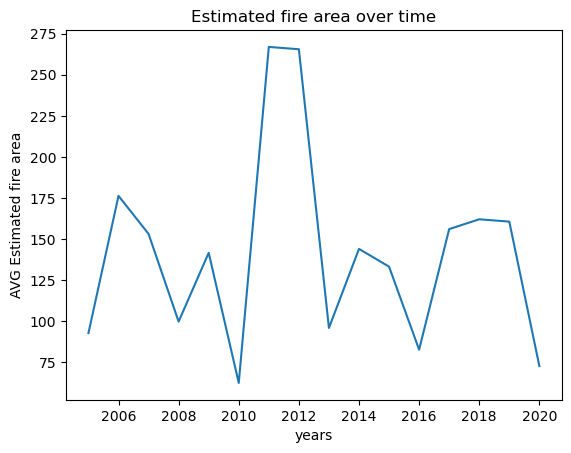

In [27]:
df_group=df.groupby('year')['Estimated_fire_area'].mean()
df_group.plot(x=df_group.index,y=df_group.values,kind='line')
plt.xlabel('years')
plt.ylabel('AVG Estimated fire area')
plt.title('Estimated fire area over time')
plt.show()

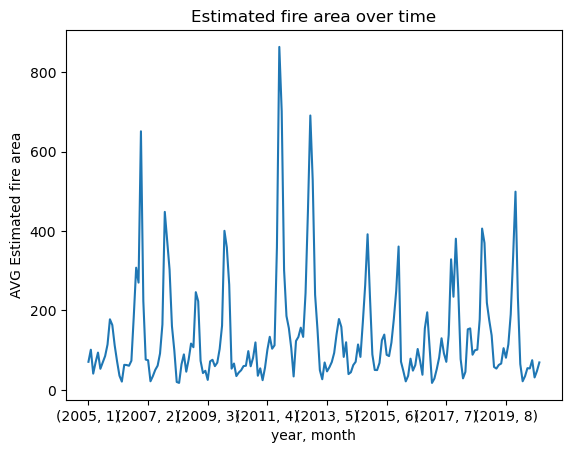

In [31]:
df_group=df.groupby(['year','month'])['Estimated_fire_area'].mean()
df_group.plot(x=df_group.index,y=df_group.values,kind='line')
plt.xlabel('year, month')
plt.ylabel('AVG Estimated fire area')
plt.title('Estimated fire area over time')
plt.show()

In [32]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

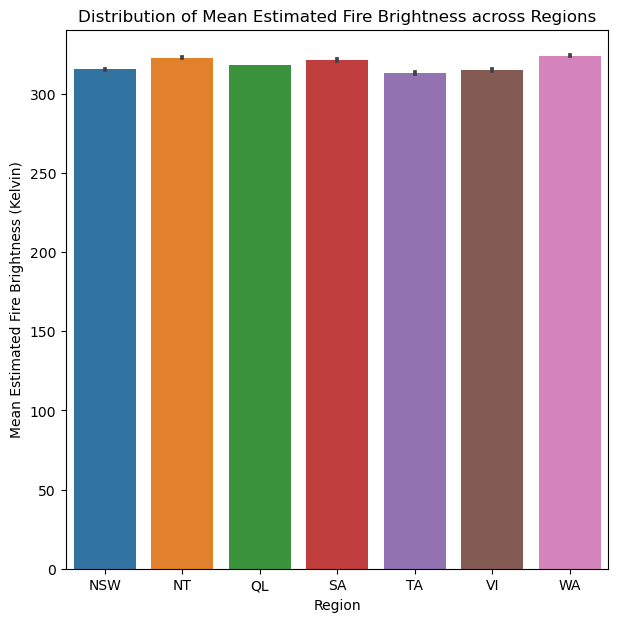

In [37]:
plt.figure(figsize=(7, 7))
sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=df)
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

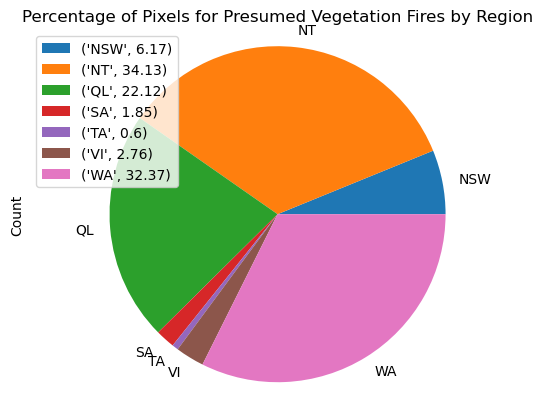

In [54]:
df_count=df.groupby('Region')['Count'].sum()
df_count.plot(kind='pie',labels=df_count.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/df_count.sum()*100,2)) for i,k in zip(df_count.index, df_count)])
plt.axis('equal')
plt.show()


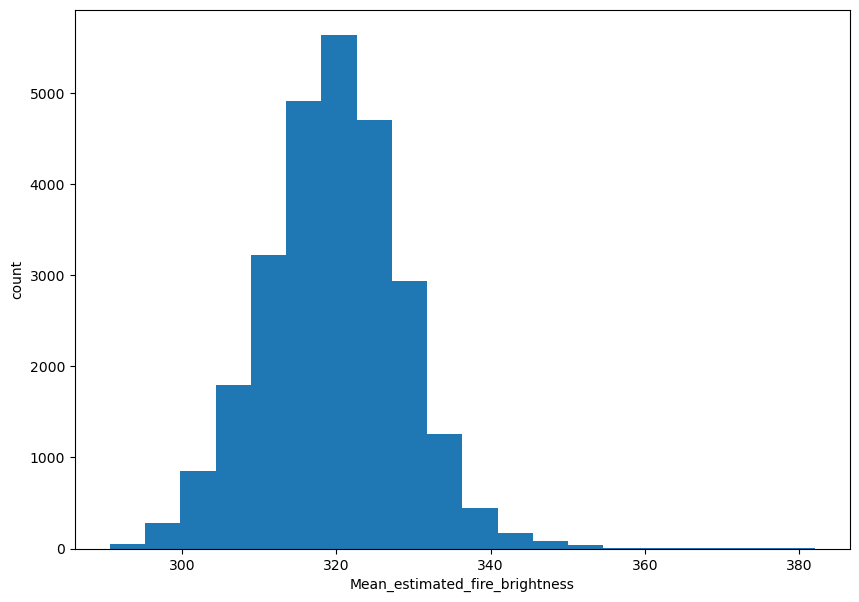

In [61]:
plt.figure(figsize=(10, 7))
count,bin_edges=np.histogram(df['Mean_estimated_fire_brightness'])
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
#df['Mean_estimated_fire_brightness'].plot(kind='hist', xticks=bin_edges)
plt.xlabel('Mean_estimated_fire_brightness')
plt.ylabel('count')
plt.show()


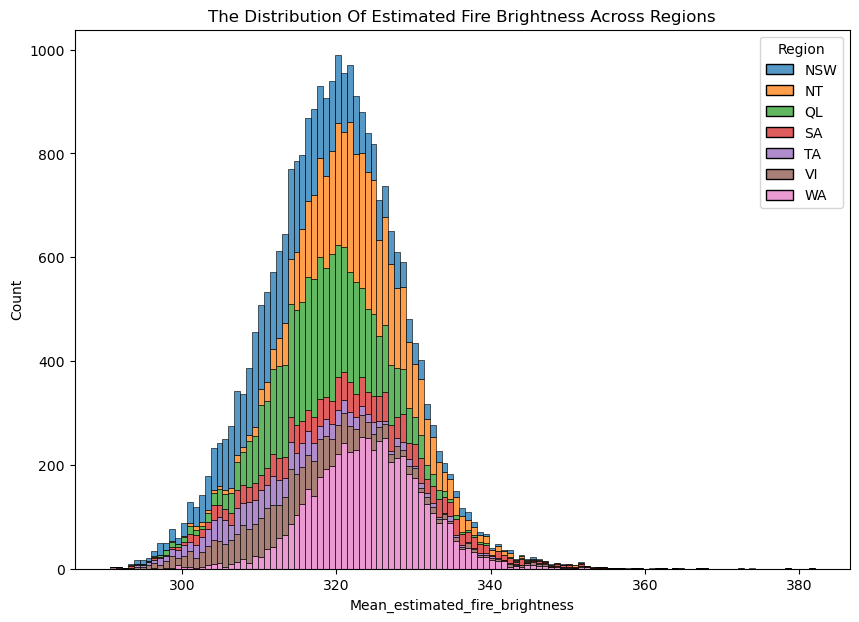

In [70]:
plt.figure(figsize=(10, 7))
sns.histplot(data = df, x ='Mean_estimated_fire_brightness', hue = 'Region',multiple='stack')
plt.title('The Distribution Of Estimated Fire Brightness Across Regions')
plt.show()

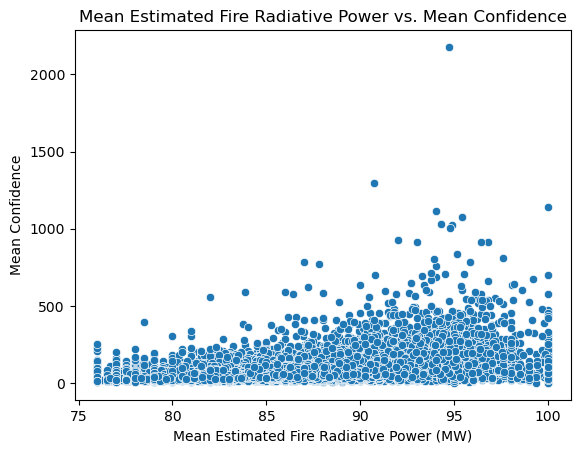

In [73]:

sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()


In [92]:
aus_reg = folium.map.FeatureGroup()
Aus_map =folium.Map(location=[-25,135], zoom_start=4)
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=7,
            color='red',
            fill=True,
            fill_color='red'
        )
    )

Aus_map.add_child(aus_reg)
